# ¿Qué es una imagen?

<img src="https://i.stack.imgur.com/gAyCl.png">

# Imágenes de prueba


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
folder = '/content/drive/MyDrive/Data-clustering/'

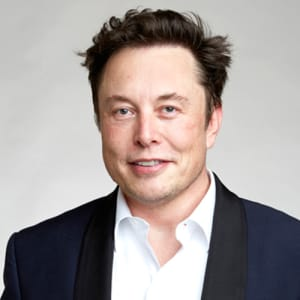

In [ ]:
from IPython.display import Image
Image(folder + 'elon.jpg', width=300)

## CV2

### Documentación: https://docs.opencv.org/master/


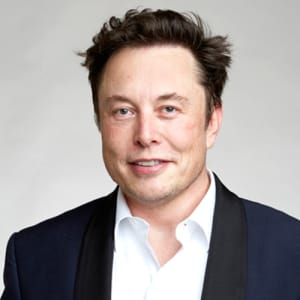

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow

#Lectura - Escritura
imagen = cv.imread(folder + 'elon.jpg')
#cv.imshow(imagen)
cv2_imshow(imagen)

In [ ]:
# Convertir a 1 canal
gray = cv.vtColor(imagen, code=7) # 7 => COLOR_RGB2GRAY
cv.imwrite('elon_gray.jpg', gray)
cv2_imshow(gray)

NameError: ignored

In [ ]:
import matplotlib.pyplot as plt
# Threshold
#https://docs.opencv.org/master/d7/d1b/group__imgproc__misc.html#ga72b913f352e4a1b1b397736707afcde3
th2 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,5,2)
th3 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY_INV,5,8)
cv2_imshow(th2)

NameError: ignored

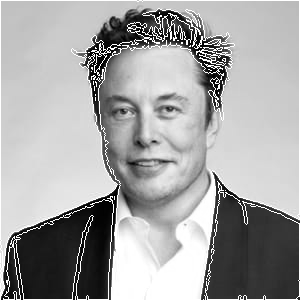

In [ ]:
# Contorno
contorno = cv.findContours(th2, cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)[0]
im_c = cv.drawContours(gray, contorno, -1, (255,255,255), 1)
cv2_imshow(im_c)

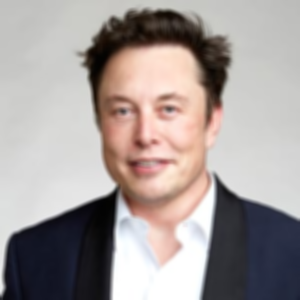

In [ ]:
#Filtros
blur = cv.blur(imagen,(5,5))
cv2_imshow(blur)

#### Otros filtros disponibles:

<img src = "https://docs.opencv.org/master/gradients.jpg">

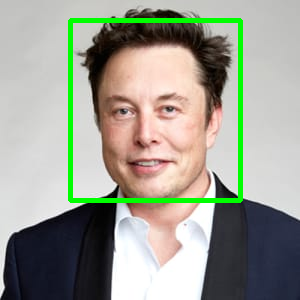

In [ ]:
# Dibujar
rec = cv.rectangle(imagen,(70,20),(240,200),(0,255,0),3)
cv2_imshow(rec)

## PIL

### Documentación: https://pillow.readthedocs.io/en/stable/reference/index.html

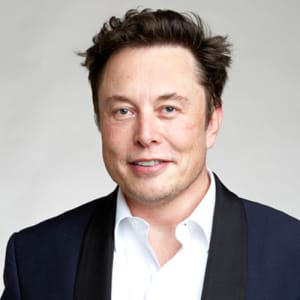

In [ ]:
# Abrir una imagen
from PIL import Image
im = Image.open(folder  + 'elon.jpg')
im

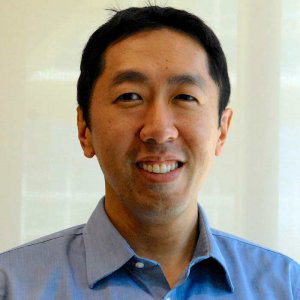

In [ ]:

#Mezclar dos imágenes
im2 = Image.open(folder + 'andrew.jpg')

im2


In [ ]:
mask = Image.new("L", im.size, 128)
com = Image.composite(im, im2, mask = mask)
com

NameError: ignored

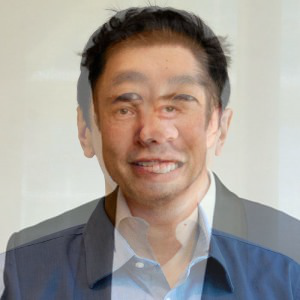

In [ ]:
blend = Image.blend(im, im2, 0.5)
blend

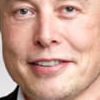

In [ ]:
#Crop
box = (100, 100, 200, 200)
region = im.crop(box)
region

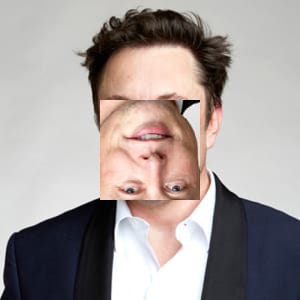

In [ ]:
region = region.transpose(Image.ROTATE_180)
im.paste(region, box)
im

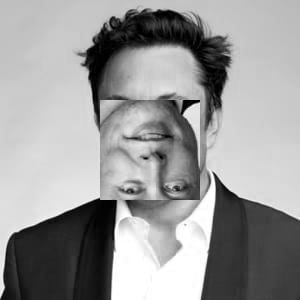

In [ ]:
r, g, b = im.split()
b

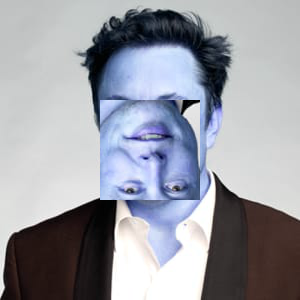

In [ ]:
im = Image.merge("RGB", (b, g, r))
im